In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [3]:
names = ["Individual", "PC1", "PC2", "PC3", "PC4", "Population"]

In [4]:
pcaDat = pd.read_csv("pca.evec",
                     delim_whitespace=True, skiprows=1, names=names)
pcaDat

,Individual,PC1,PC2,PC3,PC4,Population
0,MAL-005,0.0660,0.1315,-0.0041,-0.0067,Malawi_Yao
1,MAL-009,0.0656,0.1323,-0.0041,-0.0106,Malawi_Yao
2,MAL-011,0.0662,0.1338,-0.0020,-0.0117,Malawi_Chewa
3,MAL-012,0.0671,0.1313,-0.0035,-0.0058,Malawi_Chewa
4,MAL-014,0.0665,0.1324,-0.0019,-0.0091,Malawi_Chewa
...,...,...,...,...,...,...
13163,Mapuche:GS000011215-ASM,-0.0289,0.0002,0.0506,-0.1239,Mapuche
13164,Mapuche:GS000012210-ASM,-0.0289,0.0011,0.0702,-0.1925,Mapuche
13165,Mapuche:GS000012242-ASM,-0.0187,0.0095,0.0560,-0.1777,Mapuche
13166,Mapuche:GS000020403-ASM,-0.0246,0.0055,0.0509,-0.1474,Mapuche


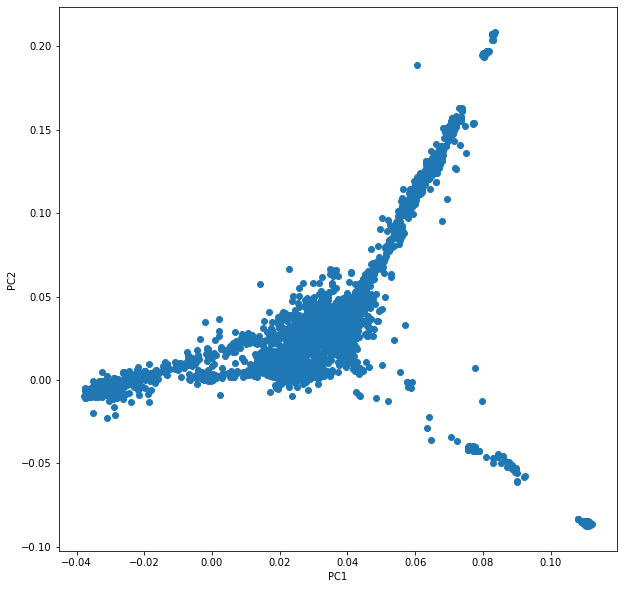

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(x=pcaDat["PC1"], y=pcaDat["PC2"])
plt.xlabel("PC1");
plt.ylabel("PC2");

In [7]:
popListDat = pd.read_csv("pops.txt",
                         names=["Population"]).sort_values(by="Population")
nPops = len(popListDat)
nCols = 10
nSymbols = int(nPops / nCols)
colorIndices = [int(i / nSymbols) for i in range(nPops)]
symbolIndices = [i % nSymbols for i in range(nPops)]
popListDat = popListDat.assign(colorIndex=colorIndices, symbolIndex=symbolIndices)
popListDat

,Population,colorIndex,symbolIndex
76,ASW_oNativeAmerican.SG,0,0
2,Ancestor.REF,0,1
143,Argentina_Aconcagua_Inca_500BP.SG,0,2
90,Argentina_ArroyoSeco2_7200BP,0,3
87,Argentina_ArroyoSeco2_7400BP_contam,0,4
...,...,...,...
144,USA_Nevada_SpiritCave_11000BP.SG,9,13
128,USA_PA_Colonist.SG,9,14
52,USA_WA_Kennewick.SG,9,15
157,Venezuela_LasLocas_Ceramic,9,16


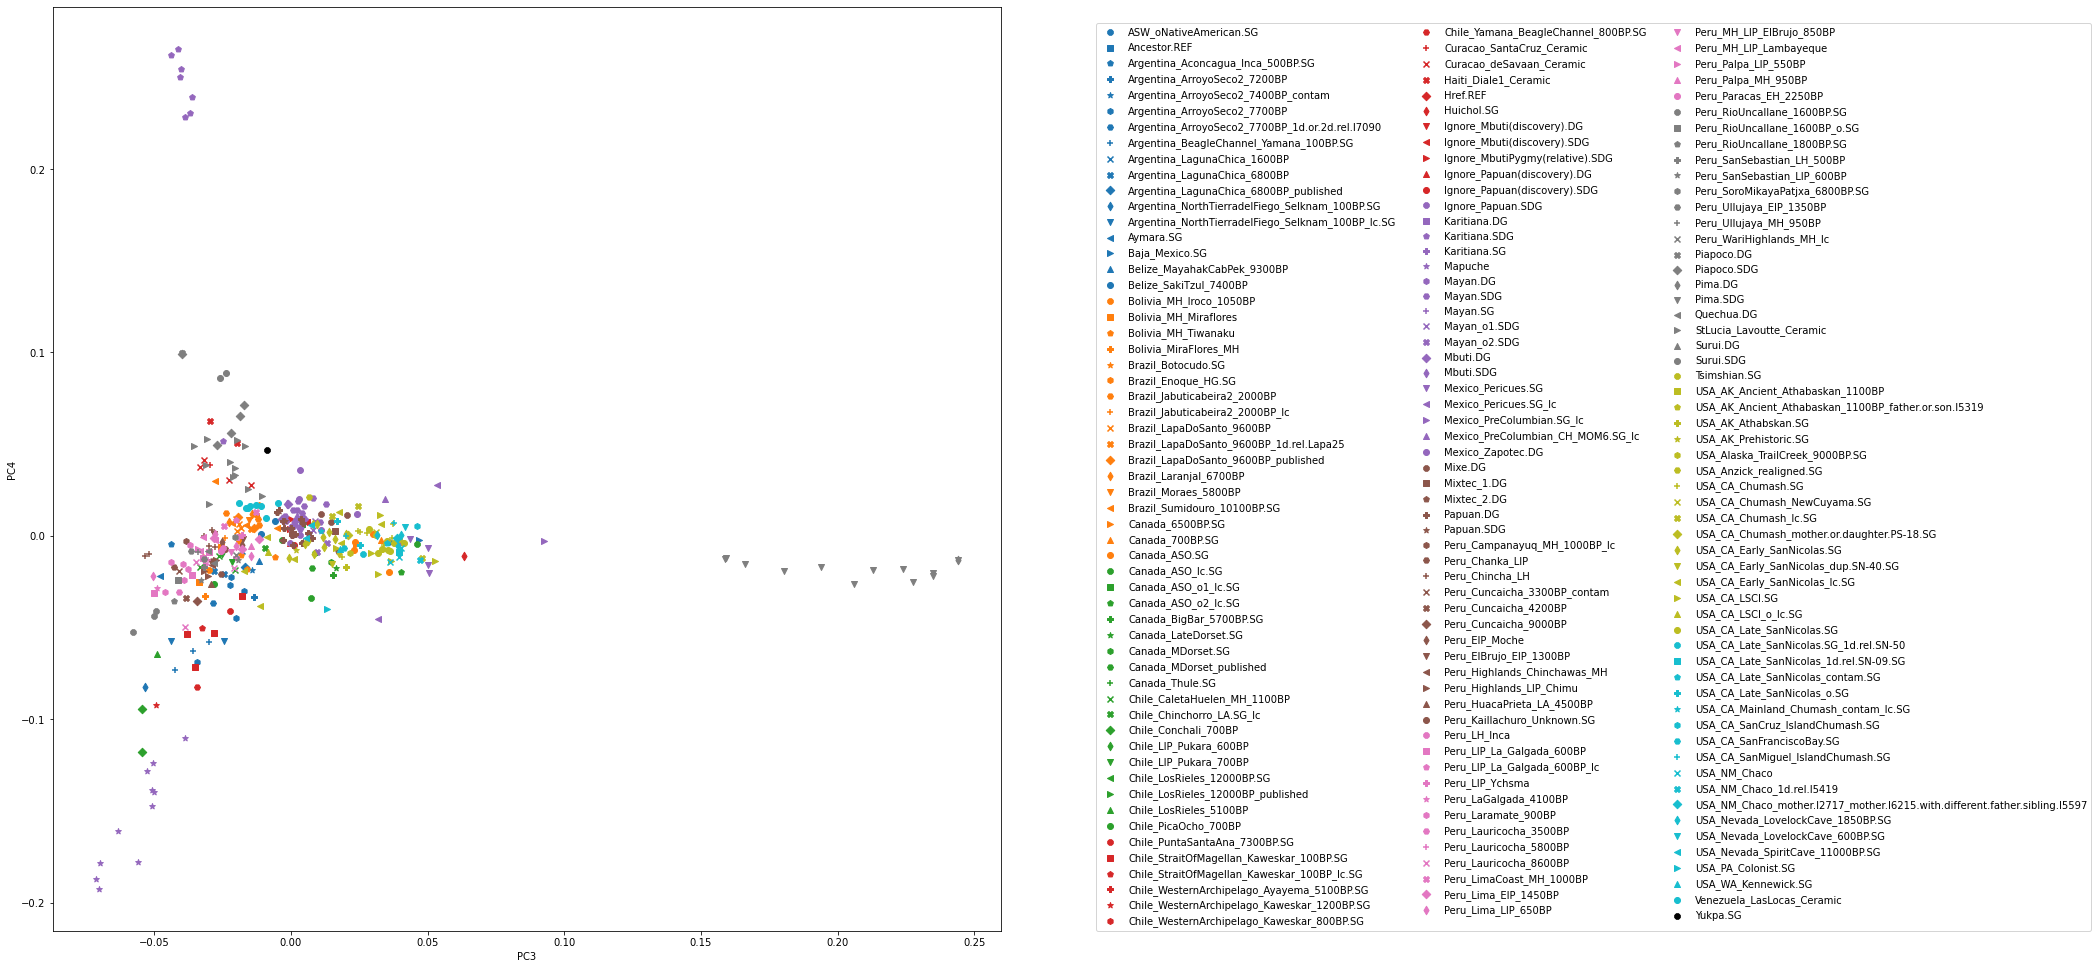

In [11]:
plt.figure(figsize=(17,17))
symbolVec = ["8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d","v", "<", ">", "^","o", "G", "g"]
colorVec = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd',
            u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf', "black"]
for i, row in popListDat.iterrows():
    d = pcaDat[pcaDat.Population == row["Population"]]
    plt.scatter(x=-d["PC3"], y=d["PC4"], c=colorVec[row["colorIndex"]],
                marker=symbolVec[row["symbolIndex"]], label=row["Population"])
plt.xlabel("PC3");
plt.ylabel("PC4");
plt.legend(loc=(1.1, 0), ncol=3)